<a href="https://colab.research.google.com/github/sttesta3/7506R-1C2024-GRUPO08/blob/desarrollo/ODD_TP1_Boceto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports y carga del archivo

In [ ]:
import pandas as pd

HOUSING_URL = "/content/drive/MyDrive/UBA /ODD/properati_argentina_2021.csv"
def load_housing_data(housing_url):
    return pd.read_csv(housing_url)

housing = load_housing_data(HOUSING_URL)

Primera mirada a la data

In [ ]:
housing.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


In [ ]:
housing.describe()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,419740.000000,419740.000000,368498.000000,344113.000000,397813.000000,4.279160e+05,4.421530e+05
mean,-34.228570,-59.557066,3.278053,2.297960,420.601250,9.605005e+03,3.063273e+05
std,3.251509,2.905129,1.870832,1.673985,4026.380748,3.440367e+06,4.899613e+06
min,-54.832057,-103.219258,1.000000,-3.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,-34.640132,-58.899343,2.000000,1.000000,50.000000,4.500000e+01,4.490000e+04
50%,-34.585122,-58.488309,3.000000,2.000000,90.000000,7.800000e+01,9.800000e+04
75%,-34.423414,-58.404876,4.000000,3.000000,210.000000,1.700000e+02,1.990000e+05
max,42.557773,-35.044991,40.000000,390.000000,200000.000000,2.147484e+09,1.500000e+09


Secciones y descarte -
Podemos ver como hay mucho que corregir en la tabla. 460154 entradas, y varios campos con menos cantidad no nula que eso

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

CONTENIDO POR SECCIONES
L2 = Provincia
L3 = Ciudad
L4 = Barrio
L5 = Barrio privado
L6 = NADA

In [ ]:
housing["place_l6"].value_counts()

Series([], Name: place_l6, dtype: int64)

In [ ]:
housing = housing.drop( columns = ["place_l6"])
housing = housing[housing.place_l2 == "Capital Federal"]

housing.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157563 entries, 25 to 460145
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        157563 non-null  object 
 1   start_date                157563 non-null  object 
 2   end_date                  157563 non-null  object 
 3   created_on                157563 non-null  object 
 4   latitud                   149873 non-null  float64
 5   longitud                  149873 non-null  float64
 6   place_l2                  157563 non-null  object 
 7   place_l3                  156526 non-null  object 
 8   place_l4                  7306 non-null    object 
 9   place_l5                  0 non-null       object 
 10  operation                 157563 non-null  object 
 11  property_type             157563 non-null  object 
 12  property_rooms            137410 non-null  float64
 13  property_bedrooms         117389 non-null  

MAPA

<Axes: xlabel='longitud', ylabel='latitud'>

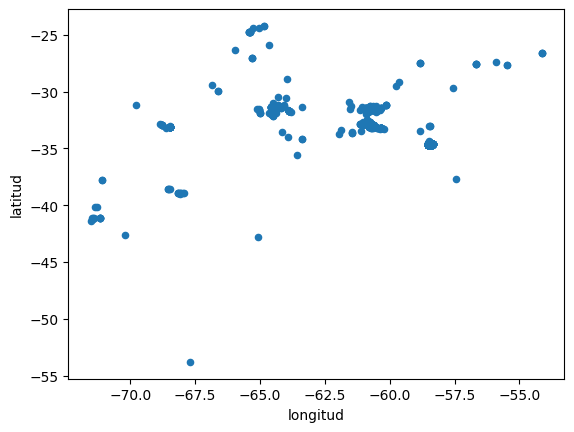

In [ ]:
housing[housing.place_l2 == "Capital Federal"].plot(kind="scatter", x="longitud", y="latitud")